In [78]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

In [20]:
df=pd.read_csv("Hitters.csv")

In [21]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [22]:
# Boş değerleri sil
df = df.dropna()

# Kategorik değişkenlere one hot encoding yapma
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])

# Bağımlı değişken
y = df["Salary"]

# Bağımsız değişkenler
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)

# X ve y'nin boyutlarını kontrol et
print(X.shape)
print(y.shape)

# Eğer boyutlar tutarlıysa, verileri ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


(263, 19)
(263,)


In [23]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [24]:
X_

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0
319,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0
320,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0


In [25]:
X.shape

(263, 19)

In [26]:
y.shape

(263,)

In [27]:
y_train.shape

(197,)

In [28]:
X_train.shape

(197, 19)

In [38]:
ridge_model=Ridge(alpha=5).fit(X_train,y_train)

In [39]:
ridge_model

Ridge(alpha=5)

In [40]:
ridge_model.coef_

array([ -1.81040449,   8.87872786,   7.12487047,  -3.31713488,
        -2.01162162,   5.40691525,   7.25828404,  -0.13033385,
        -0.25425913,  -0.71109275,   1.81452   ,   0.77083457,
        -0.6768975 ,   0.26211894,   0.2646614 ,  -0.36947934,
        76.19519054, -90.15523668, -16.00453535])

In [41]:
ridge_model.intercept_

-3.4251968687143517

In [42]:
#farklı lambda değerleri ile modeli inceleme
np.linspace(10,-2,100)

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

In [55]:
lambdalar=np.linspace(10,0,100)

In [56]:
lambdalar

array([10.        ,  9.8989899 ,  9.7979798 ,  9.6969697 ,  9.5959596 ,
        9.49494949,  9.39393939,  9.29292929,  9.19191919,  9.09090909,
        8.98989899,  8.88888889,  8.78787879,  8.68686869,  8.58585859,
        8.48484848,  8.38383838,  8.28282828,  8.18181818,  8.08080808,
        7.97979798,  7.87878788,  7.77777778,  7.67676768,  7.57575758,
        7.47474747,  7.37373737,  7.27272727,  7.17171717,  7.07070707,
        6.96969697,  6.86868687,  6.76767677,  6.66666667,  6.56565657,
        6.46464646,  6.36363636,  6.26262626,  6.16161616,  6.06060606,
        5.95959596,  5.85858586,  5.75757576,  5.65656566,  5.55555556,
        5.45454545,  5.35353535,  5.25252525,  5.15151515,  5.05050505,
        4.94949495,  4.84848485,  4.74747475,  4.64646465,  4.54545455,
        4.44444444,  4.34343434,  4.24242424,  4.14141414,  4.04040404,
        3.93939394,  3.83838384,  3.73737374,  3.63636364,  3.53535354,
        3.43434343,  3.33333333,  3.23232323,  3.13131313,  3.03

In [58]:
ridge_model=Ridge()
katsayilar=[]

for i in lambdalar:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train,y_train)
    katsayilar.append(ridge_model.coef_) #her lambda denemesinde bağımsız değişkenlerin değerlerini listeye atacak

In [59]:
katsayilar

[array([ -1.83110238,   8.91471662,   6.95563247,  -3.2988624 ,
         -1.94058277,   5.39441854,   7.02809567,  -0.12697611,
         -0.27963511,  -0.77363301,   1.83083809,   0.7951527 ,
         -0.6715745 ,   0.26289674,   0.26332372,  -0.31549535,
         60.58610716, -82.05126656,  -3.68403032]),
 array([ -1.83076096,   8.91417492,   6.95887769,  -3.29922168,
         -1.94194093,   5.39463587,   7.03225606,  -0.12702736,
         -0.27922395,  -0.77259101,   1.83054883,   0.79474876,
         -0.67166039,   0.2628811 ,   0.26333963,  -0.31617523,
         60.81531099, -82.20052145,  -3.85112622]),
 array([ -1.83041712,   8.91362756,   6.96213054,  -3.29958156,
         -1.94330247,   5.39485438,   7.03643206,  -0.1270791 ,
         -0.27880964,  -0.77154204,   1.83025811,   0.79434208,
         -0.67174692,   0.26286546,   0.26335584,  -0.31686675,
         61.04704039, -82.35032143,  -4.02059165]),
 array([ -1.83007081,   8.91307446,   6.96539099,  -3.29994204,
         -1.

Text(0.5, 0, 'lambdalar')

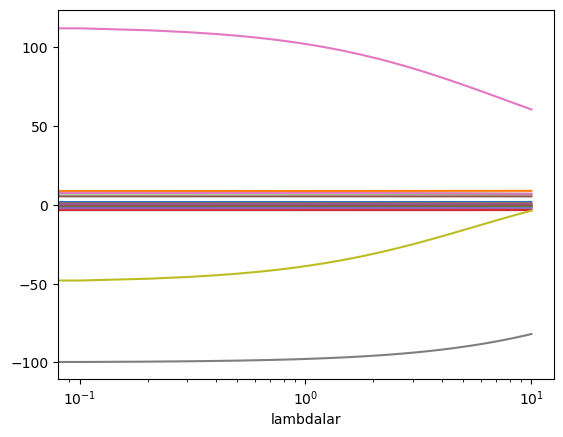

In [63]:
ax=plt.gca()
ax.plot(lambdalar,katsayilar)
ax.set_xscale("log")
ax.set_xlabel("lambdalar")

lambdalar artıkça değerler 0 yaklaşmıştır

## Tahmin - Predict

In [66]:
ridge_model=Ridge().fit(X_train,y_train)

In [67]:
y_pred=ridge_model.predict(X_train)

In [69]:
y_pred[0:10] #tahmin edilen değerler

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [71]:
y_train[0:10] #gerçek değerler

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [72]:
RMSE=np.sqrt(mean_squared_error(y_train,y_pred))

In [74]:
RMSE # valide edilmemiş train hatası 

289.34470696006565

In [82]:
#valide edilmiş train hatası - daha doğru olan hata
np.sqrt(np.mean(-cross_val_score(ridge_model,X_train,y_train,cv=10 ,scoring="neg_mean_squared_error"))) 

351.3931585606363

In [83]:
#Test hatası
y_pred=ridge_model.predict(X_test)

In [84]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

356.80829057302344

In [85]:
np.sqrt(np.mean(-cross_val_score(ridge_model,X_test,y_test,cv=10 ,scoring="neg_mean_squared_error"))) 

474.55246818788356

## MODEL TUNİNG

neden model tuning?
-en uygun parametre değerini bulmaya çalışıyoruz amacımız bu

In [93]:
ridge_model=Ridge(10).fit(X_train,y_train)
y_pred=ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.3054852721749

In [94]:
np.random.randint(0,1000,100)

array([760,  97, 832, 890, 497, 262, 987,   7, 217, 326,  21, 952, 406,
       334, 355,  94, 653, 489, 627, 468, 253, 740, 387, 971, 530, 657,
       854, 725,  13, 751, 947, 299, 587,  25, 526, 199, 182, 276, 959,
       788, 917, 260, 365, 988, 473, 908, 902,  31, 950, 476, 666, 204,
       473, 405, 405, 424, 105, 888, 851, 782, 871, 227, 758, 237, 756,
       935, 436, 400, 396, 813,  30, 804,  73, 975, 500, 419, 363, 919,
       898,  57, 821, 107, 687, 701, 701,  67, 149, 363, 910, 847, 669,
       349, 306, 567, 692, 597, 301, 980,  93,  48])

In [95]:
lambdalar1=np.random.randint(0,1000,100)

In [96]:
lambdalar2=10**np.linspace(10,0,100)*0.5

In [107]:
ridge_cv=RidgeCV(alphas=lambdalar1,scoring="neg_mean_squared_error",cv=10)
ridge_cv.fit(X_train,y_train)

RidgeCV(alphas=array([912, 713, 897, 251, 728, 138, 415, 785, 430, 230, 781, 968, 463,
       605, 507, 775, 761, 648, 848, 444, 352, 617, 749, 100, 941, 504,
       258, 262, 926, 827, 293, 838, 750, 774, 777, 424, 882,  56, 586,
       216,  85, 412, 747, 832, 204, 876, 955, 314, 378, 385, 787, 747,
       702, 494, 753, 235, 575, 219, 825, 129, 131, 426, 546, 592, 659,
       947, 724, 383, 550, 988, 895, 556, 329, 273, 307, 597, 196, 250,
       911, 862, 791, 834, 324, 437, 372, 976, 123, 351, 280, 994, 666,
       499, 571, 925, 721, 976, 619, 567, 542, 332]),
        cv=10, scoring='neg_mean_squared_error')

In [108]:
ridge_cv.alpha_

56

### final modeli

In [109]:
ridge_tuned=Ridge(alpha=ridge_cv.alpha_).fit(X_train,y_train)

In [110]:
y_pred=ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

357.2174058962725